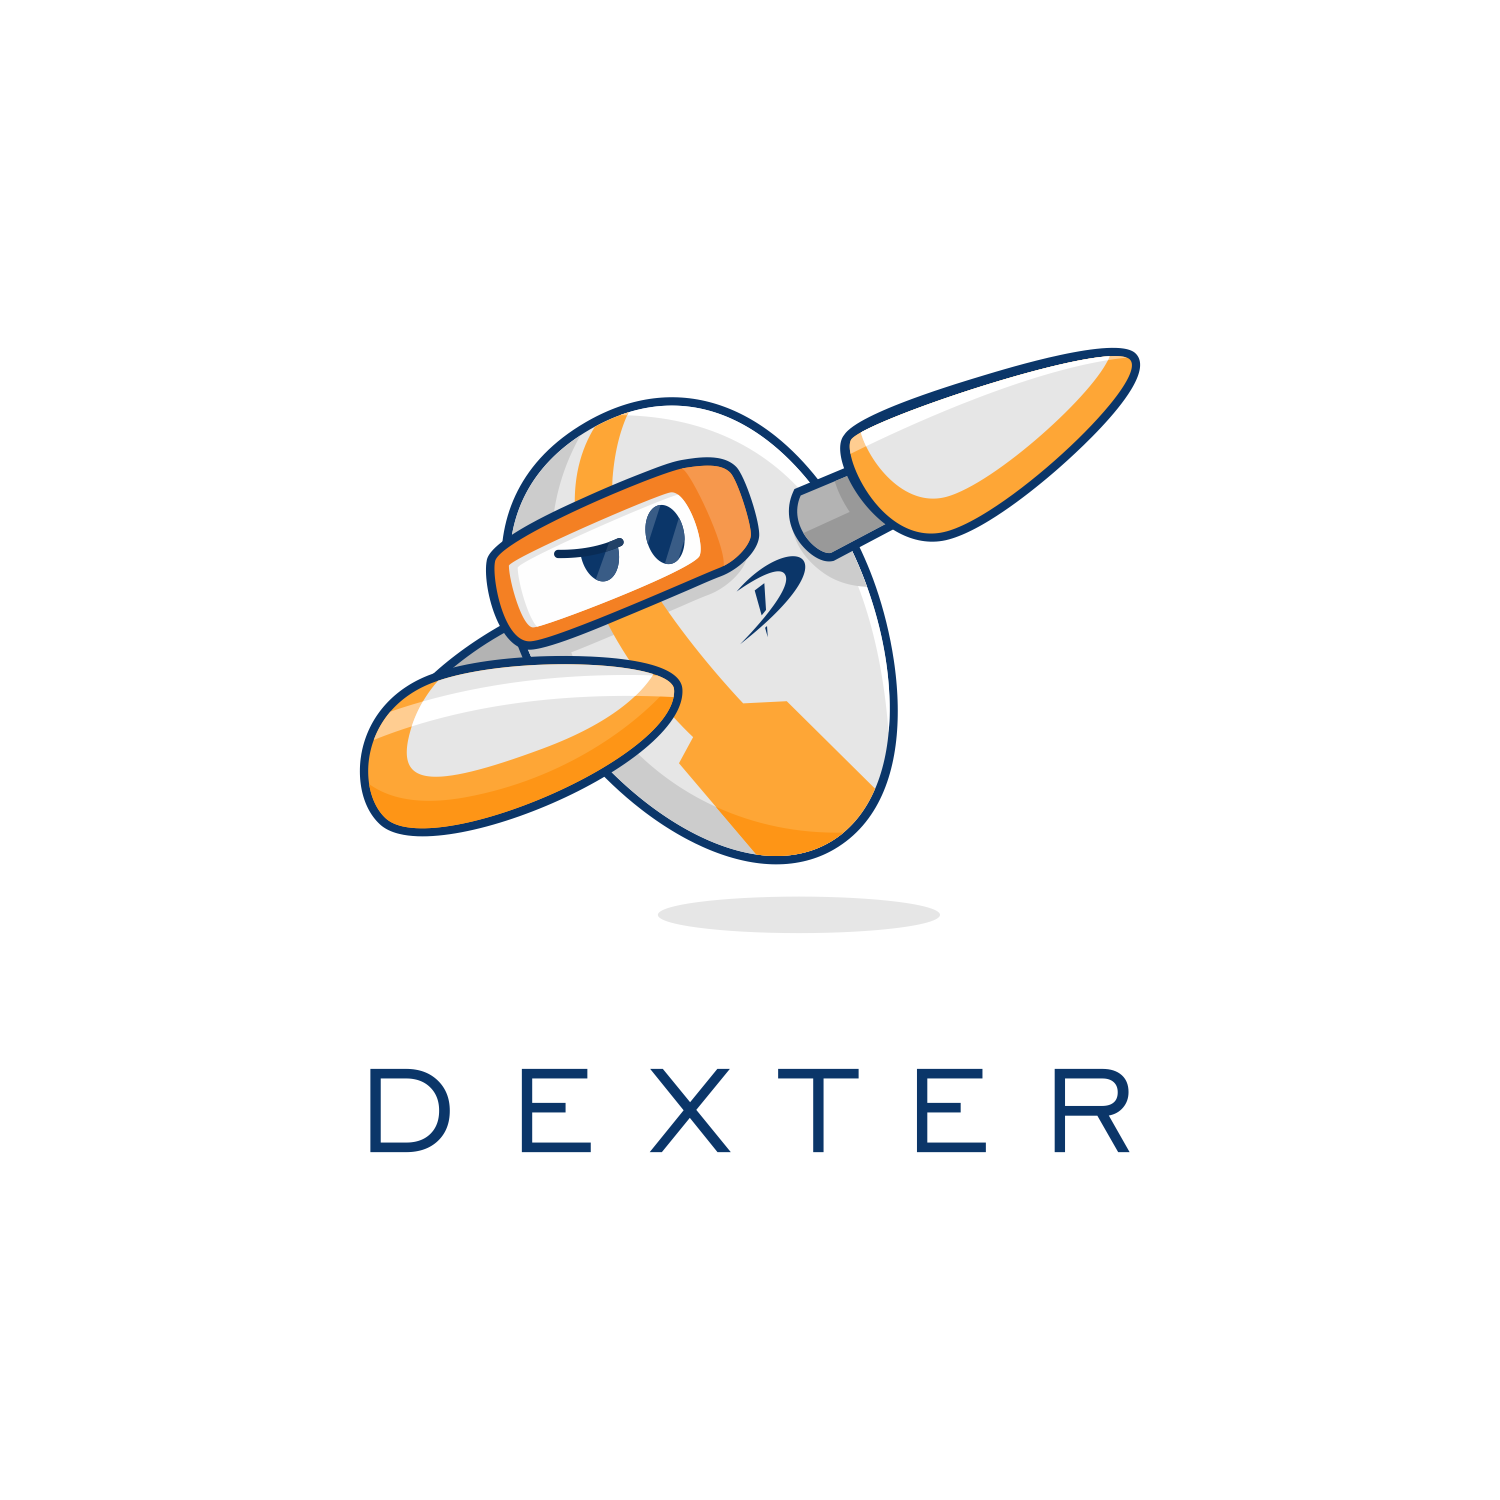

# Lending Club Project (Random Forest)




For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In this project we will be comparing random forest and decision tree techniques side by side. The result will be displayed at the last of the project.
Let's know a bit deeper about both random forest and decision tree. 

**Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.**

**Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).**


### Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#reading dataset
df = pd.read_csv('loan_data-Copy1.csv')

In [11]:
df.head(51)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.value_counts()

credit.policy  purpose             int.rate  installment  log.annual.inc  dti    fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid
1              small_business      0.2121    755.69       11.248960       5.72   672   1440.000000        500        83.3        1               0            0        0                 1
               all_other           0.1284    255.50       10.714418       0.00   757   1410.000000        0          0.0         0               0            0        1                 1
                                             235.33       9.574983        3.00   707   1199.958333        3449       19.7        2               0            0        1                 1
                                             221.88       11.156251       5.26   742   2850.000000        993        24.8        0               0            0        0                 1
                                             201.71       10.645425   

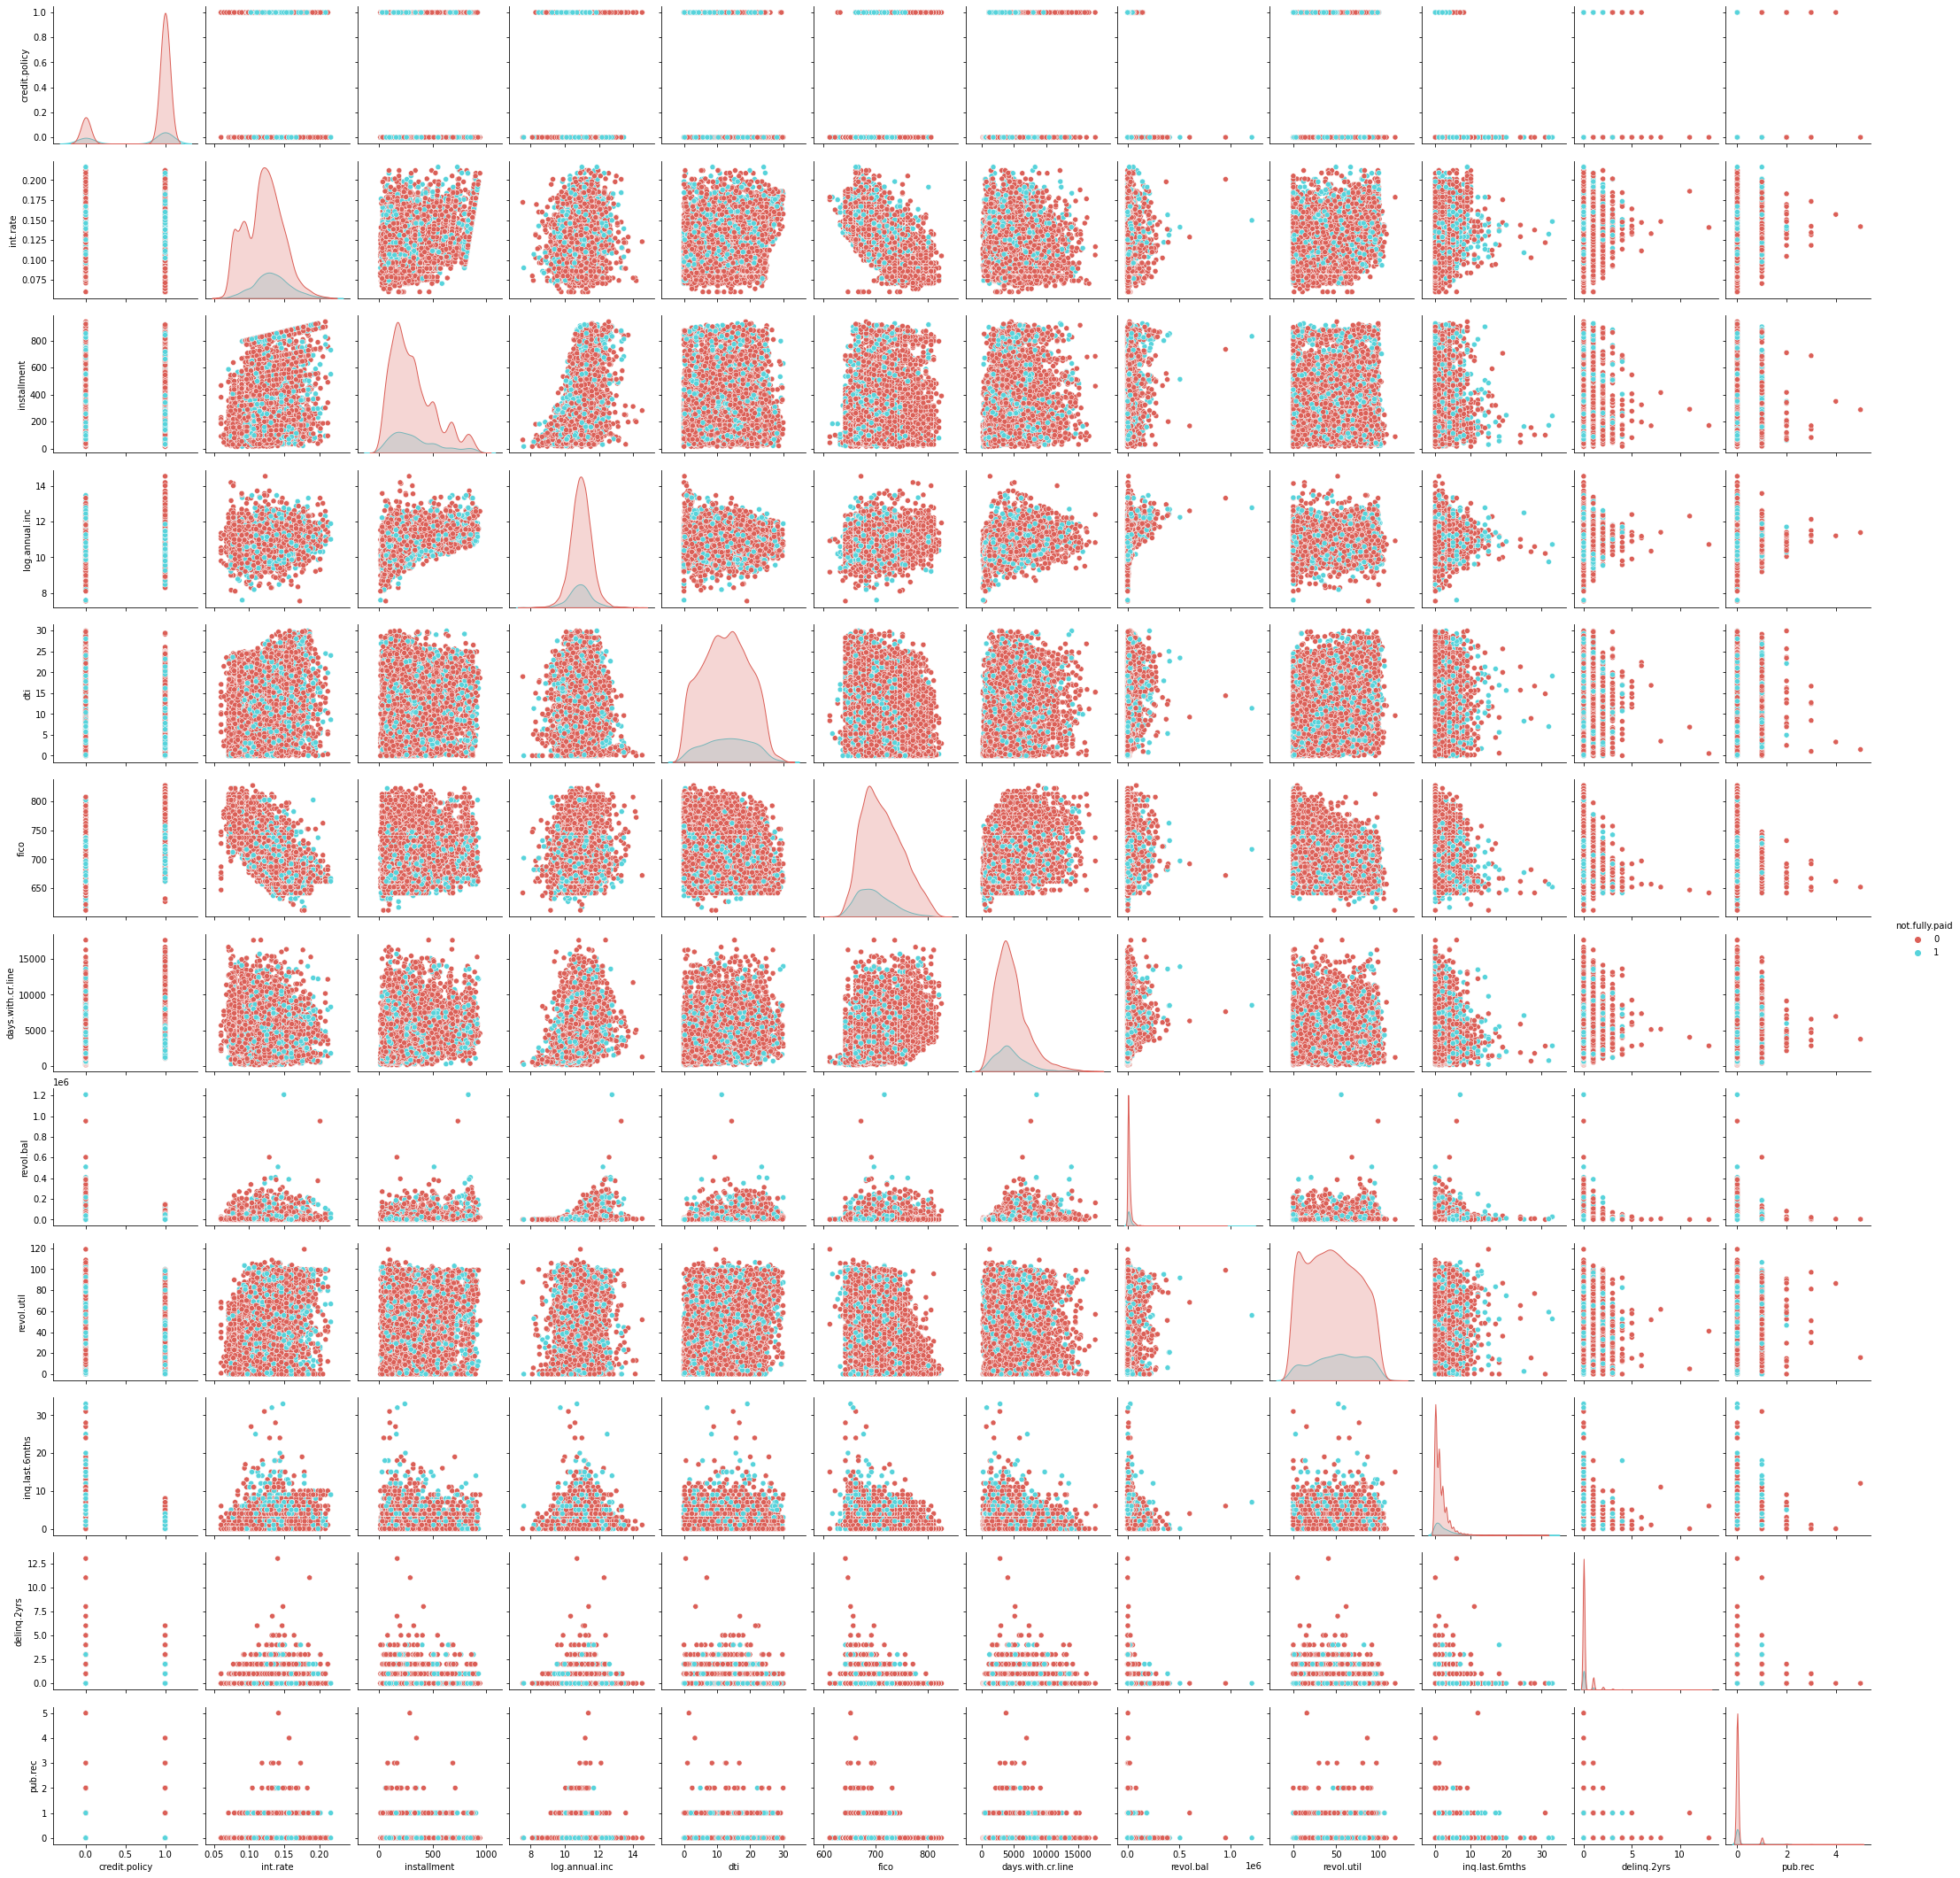

In [8]:
#creating pairplot to understand the connectivity between the columns vs not.fully.paid
sns.pairplot(df, hue='not.fully.paid', palette='hls')

<AxesSubplot:>

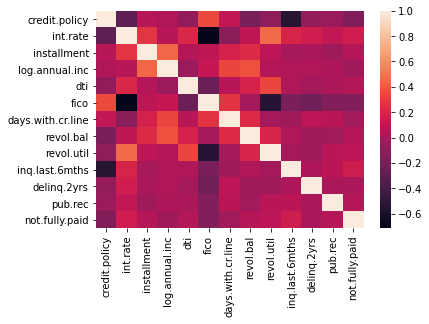

In [14]:
#creating heatmap correlation 
sns.heatmap(df.corr())

# Exploratory Data Analysis (EDA)

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome**


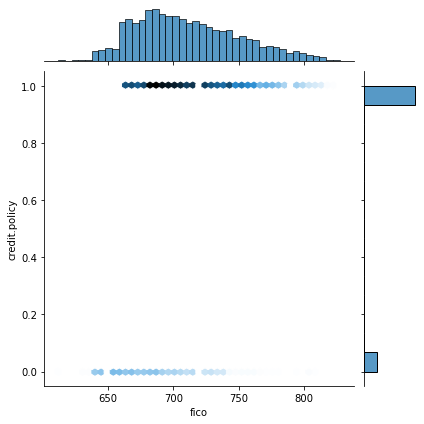

In [24]:
#creating the histogram between fico and credit.policy
sns.jointplot(data=df,x='fico', y='credit.policy',kind='hex')

Above we were unable to co relate the graphs thats why now we are going to understand the graph by using the credit.policy zero and one value over fico column to get the better output.

Text(0.5, 0, 'fico')

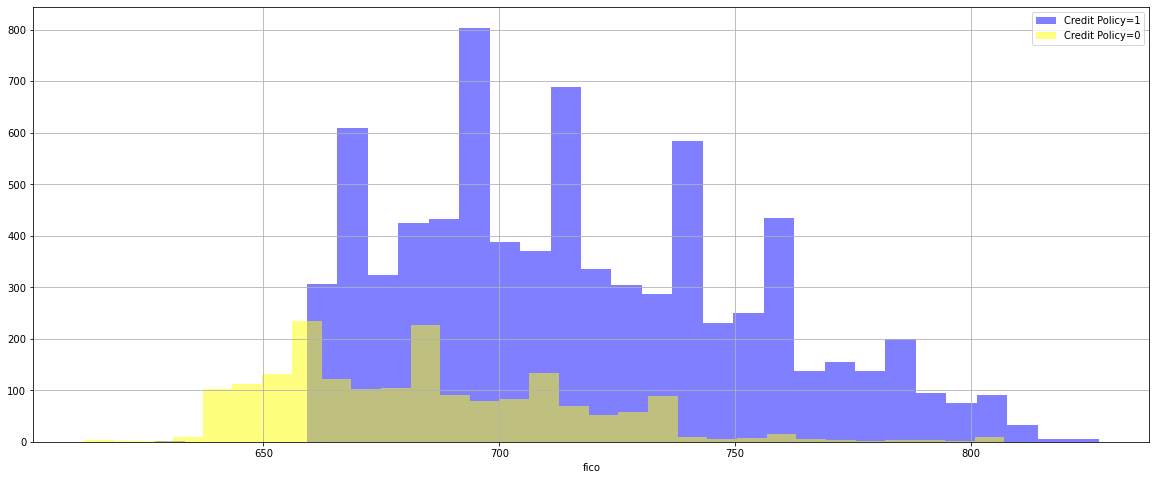

In [36]:
#we will be plotting graph using matplolib as an overlapping graph
plt.figure(figsize=(20,8))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                      bins=31,label='Credit Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='yellow',
                                       bins=31,label='Credit Policy=0')
plt.legend()
plt.xlabel('fico')

The above graph clearly shows that people who are below the 650 do not meet the criteria of LendingClub.com which can be seen through the "Fico" graph in blue. This means they are not eligble or not paying the credit that has been set by the LendingClub.
    
To understand the better concept of the getting fully paid and not paid we must explore the column named 'not.fully.paid.column'

Creating a similar graph, but this time selecting by the not.fully.paid column.

Text(0.5, 0, 'Fico')

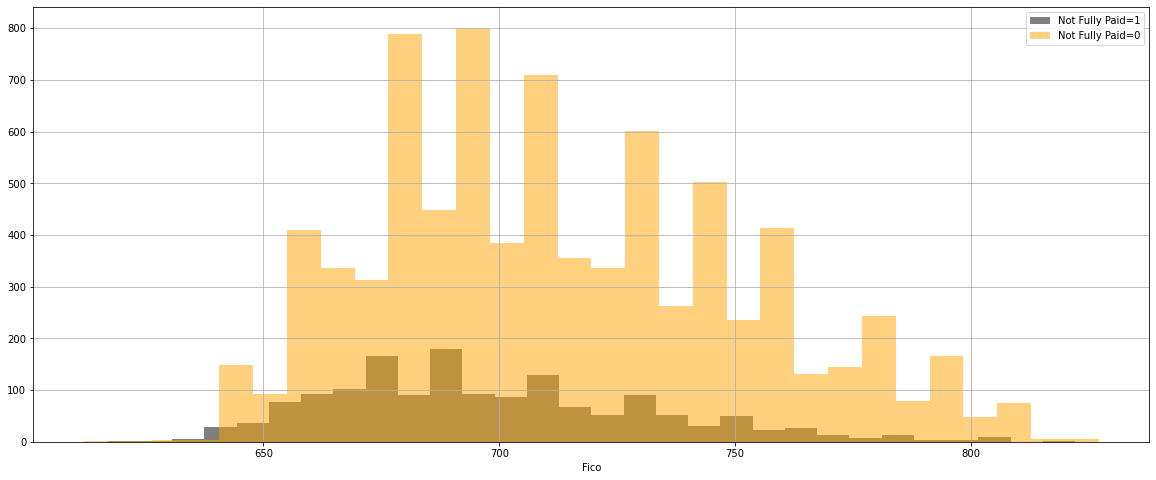

In [37]:
#plotting graph fico vs not fully paid is equal to 1 and 0.
plt.figure(figsize=(20,8))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='black',
                                        bins=30,label='Not Fully Paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='orange',
                                        bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('Fico')

The above represents the credit score between 0 & 1 that means people who are at zero are paying off and the people are falling under the catergory of credit 1 are not paying off. 

The above graph cutoff is not sharp enough to get better idea. To inspect further we must do little more inspection using the purpose column to get the better insights of the paying pattern.

**Creating a countplot using seaborn showing the counts of loans by "purpose", with the color hue defined by "not.fully.paid".**

<AxesSubplot:xlabel='purpose', ylabel='count'>

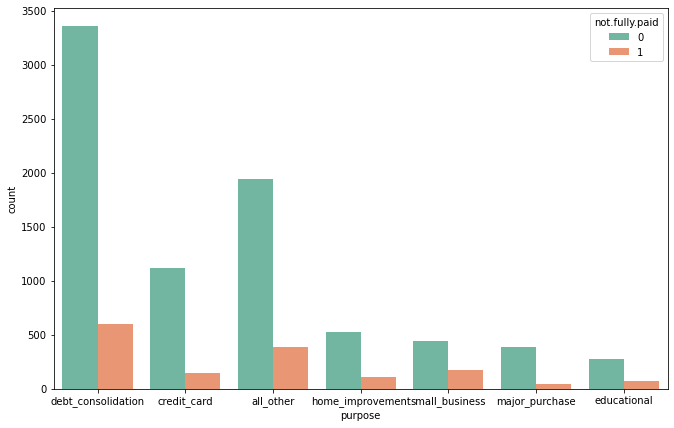

In [48]:
#exploring the 'not.fully.paid' with respect to the 'purpose'.
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set2')

As it clearly obeservational that there is the highest loss in the debt_consolidation and least in the educational. While the credit_card, home_improvement andmajor_purchase posses the share the same equity.
The company must focus on the debt_consolidation and all_other debts. The small debts can be easily recovered while the LendingClub must focus on the debt_consolidation. 
We must also check the intereset rate that must clear all our doubts regaring the recovery of the debts.

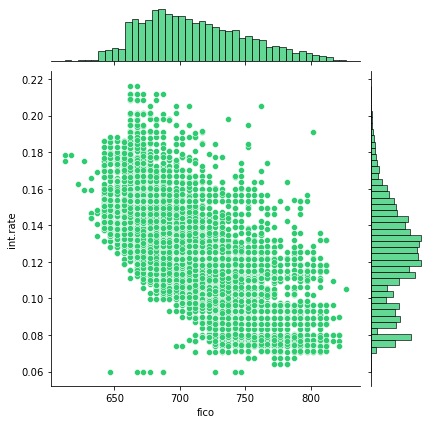

In [54]:
#fico vs int.rate using jointplot

sns.jointplot(x='fico',y='int.rate',data=df,color='#2ecc71')

It's clear that the fico score increases we have better credit and if the fico score decreases it means we have low credit values.


#### Checking the trend  difference between the 'credit.policy' and 'int.rate' and further seperating into the  two columns

<Figure size 792x504 with 0 Axes>

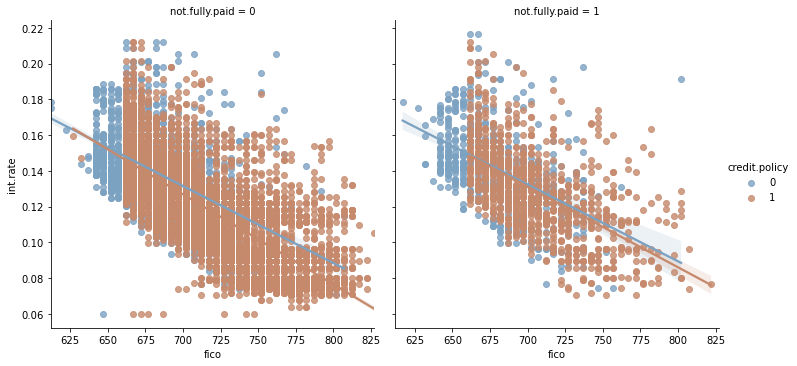

In [76]:
#creating a implot with respect to 'credit.policy' and setting x axis as 'fico' and y axis as 'int.rate'
plt.figure(figsize=(11,7))
sns.lmplot(x="fico", y="int.rate", hue="credit.policy", data=df, col='not.fully.paid',palette='twilight_shifted')

As we can clearly find the behavior remains the same, whether or not paid off or no. Where colouring represents the credit policy and non colouring represents the not fully paid.

# Setting Up Model for the Data
Setting up the data model **(Random Forest Classification)**

In [5]:
#checking the df info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


 ### Purpose is a category columns that means it contains some object
 
 
That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's do this by dealing with the columns that can be expanded to multiple categorical features if necessary.

Creating a list of 1 element containing the string 'purpose'. Call this list 'cat_feats'.

In [6]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [7]:
final_df = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [9]:
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train test split data

#### Its time to train and split the data into new training and test set using sklearn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = final_df.drop('not.fully.paid',axis=1)
y = final_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=110)

# Training a Decision Tree

#### Training Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation of Decision Tree


In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2508
           1       0.20      0.22      0.21       462

    accuracy                           0.74      2970
   macro avg       0.53      0.53      0.53      2970
weighted avg       0.75      0.74      0.75      2970



In [21]:
print(confusion_matrix(y_test,predictions))

[[2112  396]
 [ 362  100]]


The decision tree model gave an accuracy around 75%. let's further explore the concept and random forest and understand the result difference by applying various parameters in randomforest.

## Training Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=750)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=750)

# Prediction and Evaluation
Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [45]:
predictions = rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2508
           1       0.42      0.02      0.04       462

    accuracy                           0.84      2970
   macro avg       0.63      0.51      0.48      2970
weighted avg       0.78      0.84      0.78      2970



In [48]:
print(confusion_matrix(y_test,predictions))

[[2494   14]
 [ 452   10]]


The random forest gave the output accuracy of 78%. As it comes to comparing it with the decision tree its quite abovious that random forest has perfomed better than that of decision tree.
By digging deeper with the other parameters the decision tree extracted the better recall rate and f-1 score. The Random forest does better on the precision rate as compared with the decision tree.

# Result

The probability of getting back credit lies somewhere between 78% - 75%. So as per the data provided and using the ML models it clear that there is high probability that the customers will retreive back credit.